# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [252]:
df = pd.read_csv('/content/drive/MyDrive/DBS/TUGAS MACHINE LEARNING/Dataset_hasil_clustering.csv')

In [253]:
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Cluster,TransactionID,AccountID,TransactionDate,DeviceID,IP Address,MerchantID,PreviousTransactionDate
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,1,TX000001,AC00128,2023-04-11 16:29:14,D000380,162.198.218.92,M015,2024-11-04 08:08:08
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,0,TX000002,AC00455,2023-06-27 16:44:19,D000051,13.149.61.4,M052,2024-11-04 08:09:35
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,1,TX000003,AC00019,2023-07-10 18:16:08,D000235,215.97.143.157,M009,2024-11-04 08:07:04
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,1,TX000004,AC00070,2023-05-05 16:32:11,D000187,200.13.225.150,M002,2024-11-04 08:09:06
4,13.45,26.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,0,TX000005,AC00411,2023-10-16 17:51:24,D000308,65.164.3.100,M091,2024-11-04 08:06:39


In [254]:
df = df.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate'])
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Cluster
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,1
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,0
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,1
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,1
4,13.45,26.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [255]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [256]:
numerical_columns

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'Cluster'],
      dtype='object')

In [257]:
categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
encoder_dict = {}
encoder = LabelEncoder()

# Fit and store LabelEncoders for each categorical feature
for col in categorical_features:
    encoder_dict[col] = LabelEncoder()  # Create a new LabelEncoder
    df[col] = encoder_dict[col].fit_transform(df[col])  # Fit and transform

df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Cluster
0,14.09,70.0,81.0,1.0,5112.21,1,36,0,0,1
1,376.24,68.0,141.0,1.0,13758.91,1,15,0,0,0
2,126.29,19.0,56.0,1.0,1122.35,1,23,2,3,1
3,184.50,26.0,25.0,1.0,8569.06,1,33,2,3,1
4,13.45,26.0,198.0,1.0,7429.40,0,1,2,3,0


In [258]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [259]:
X = df_train.drop(columns=['Cluster'])
y = df_train['Cluster']

In [260]:
X.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation
1626,18.23000,56.0,28.0,1.0,8422.20,1,26,0,1
1313,333.97000,52.0,45.0,1.0,5237.36,1,14,1,0
942,446.39000,63.0,77.0,1.0,7863.60,1,15,0,2
1770,1.82000,80.0,60.0,1.0,5571.39,1,37,2,2
1984,913.49125,19.0,50.0,1.0,9963.39,1,30,2,3


In [261]:
Scaler = MinMaxScaler()
X_scalled = Scaler.fit_transform(X)

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X_scalled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1607, 9), (402, 9), (1607,), (402,))

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [263]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression()

In [264]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

Pada klasifikasi ini saya menggunakan dua model yang berbeda yaitu LogisticRegression dan RandomForestClassifier tanpa dilakukan tuning parameter untuk melihat sejauh mana model bekerja pada setingan deafult

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

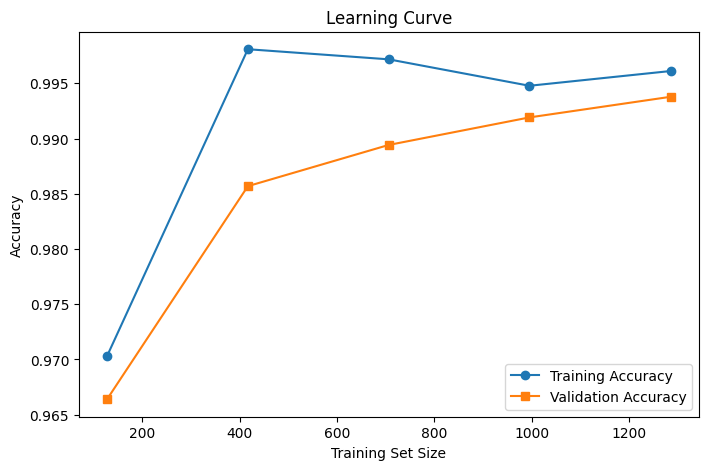

In [265]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model_log, X_train, y_train, cv=5, scoring='accuracy')

# Rata-rata dan standar deviasi
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='s')

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [266]:
pred_log = model_log.predict(X_test)

In [267]:
pred_rfc = model_rfc.predict(X_test)

In [268]:
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       0.99      0.99      0.99       190

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



In [269]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       212
           1       1.00      1.00      1.00       190

    accuracy                           1.00       402
   macro avg       1.00      1.00      1.00       402
weighted avg       1.00      1.00      1.00       402



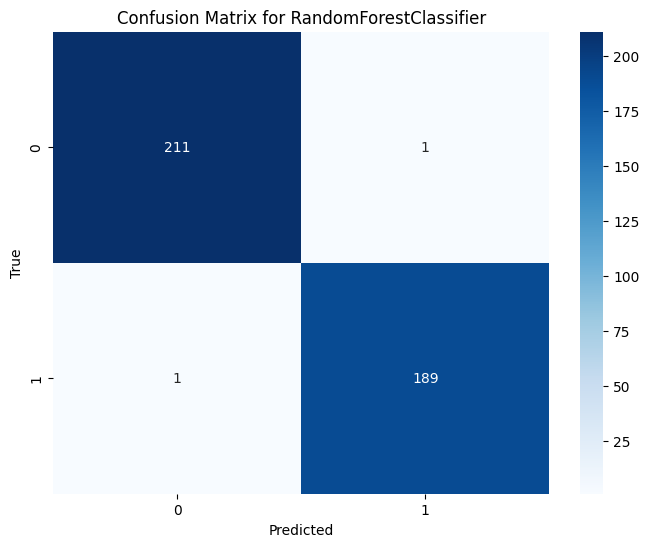

In [270]:
# Create the confusion matrix
cm_log = confusion_matrix(y_test, pred_log)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


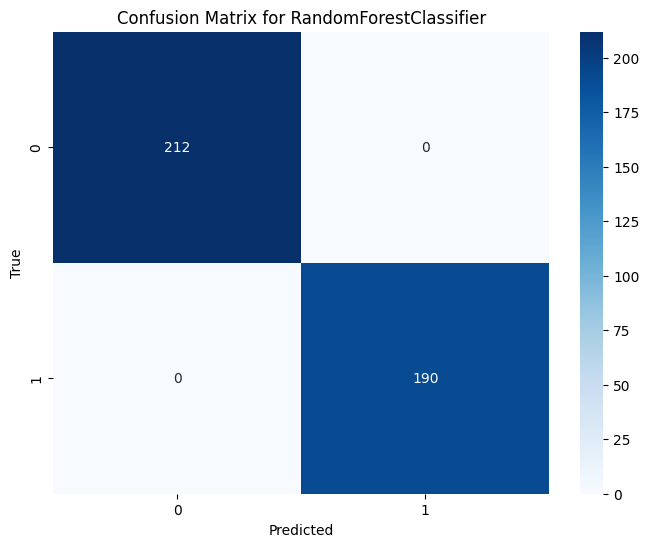

In [271]:
# Create the confusion matrix
cm_rfc = confusion_matrix(y_test, pred_rfc)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


In [272]:
X_val = df_test.drop(columns=['Cluster'])
y_val = df_test['Cluster']

In [273]:
scaler = MinMaxScaler()
X_val = scaler.fit_transform(X_val)

In [274]:
val = model_log.predict(X_val)

In [275]:
print(classification_report(y_val, val))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       267
           1       0.98      1.00      0.99       236

    accuracy                           0.99       503
   macro avg       0.99      0.99      0.99       503
weighted avg       0.99      0.99      0.99       503



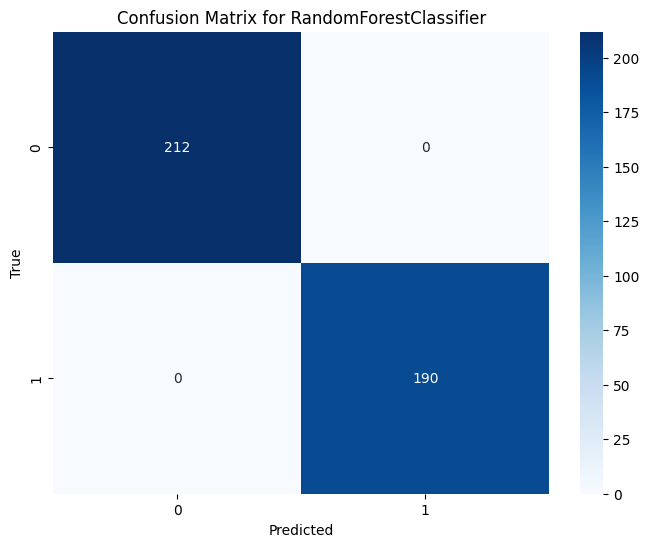

In [276]:
# Create the confusion matrix
cm_val = confusion_matrix(y_val, val)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


In [277]:
print(np.unique(pred_log, return_counts=True))
print(np.unique(pred_rfc, return_counts=True))

(array([0, 1]), array([212, 190]))
(array([0, 1]), array([212, 190]))


In [278]:
print(df['Cluster'].value_counts())

Cluster
0    1282
1    1230
Name: count, dtype: int64


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [279]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 atau L2 Regularization
    'solver': ['liblinear', 'saga'],  # Solver yang mendukung L1 dan L2
    'max_iter': [100, 200, 500]  # Iterasi maksimum
}
rand_search = RandomizedSearchCV(model_log, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rand_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", rand_search.best_params_)
print("Best Score:", rand_search.best_score_)

Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'max_iter': 500, 'C': 0.1}
Best Score: 1.0


In [280]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon dalam hutan
    'max_depth': [10, 20, 30, None],  # Maksimum kedalaman pohon
    'min_samples_split': [2, 5, 10],  # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],  # Minimum sampel di daun pohon
    'max_features': ['sqrt', 'log2'],  # Fitur yang dipertimbangkan per split
    'bootstrap': [True, False]  # Bootstrap sampling atau tidak
}

rand_search = RandomizedSearchCV(model_rfc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rand_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", rand_search.best_params_)
print("Best Score:", rand_search.best_score_)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Best Score: 1.0


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Model yang dituning dan sebelum dituning mendapatkan hasil akurasi yang sama dengan menggunakan perhitungan F1, keduanya mendapatkan accuracy 1 atau 100% benar. Sudah dilakukan split test data training dan data testing sebagai validasi. Dan di data training sudah dilakukan lagi splitting untuk data training dan data testing hasil tetap menunjukkan 1. Hal ini mungkin model mengalami overfitting, dan pada data latih memiliki kemiripan yang besar dengan data training, sehingga model sangat akurat ketika memprediksi